# Plot gradients in speed and weather to assess timing alignments

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Load datasets

In [15]:
data_path = '/Users/raineyaberle/Research/Hubbard/'
out_path = '/Users/raineyaberle/Research/Hubbard/figures/'
crs = 'EPSG:3338'

# Ocean temps
ocean_fn = os.path.join(data_path, 'GAK_smooth.csv')
ocean = pd.read_csv(ocean_fn)
ocean['Date'] = pd.to_datetime(ocean['Date'])
# Take the mean ocean temperature for 25–250 m depth
ocean.set_index('Date', inplace=True)
ocean['Mean_ocean_temp_C'] = ocean.mean(axis=1)
# Resample to daily
ocean.drop_duplicates(inplace=True)
ocean = ocean.resample('1D').interpolate('time')
ocean.reset_index(inplace=True)
ocean = ocean[['Date', 'Mean_ocean_temp_C']]

# Terminus, speed, and weather
df_fn = os.path.join(data_path, 'terminus', 'terminus_speed_weather.csv')
df = pd.read_csv(df_fn)
df['Date'] = pd.to_datetime(df['Date'])
df.drop_duplicates(inplace=True)
# Resample to daily
df.set_index('Date', inplace=True)
df = df.resample('1D').interpolate('time')
df.reset_index(inplace=True)
# Replace data gaps at Haenke (~late 2020 to mid-2021) with NaNs
df.loc[(df['Date'] >= np.datetime64('2020-11-01')) & (df['Date'] <= np.datetime64('2021-10-01')),
       ['AirTempC_Haenke1', 'AirTempC_Haenke2']] = np.nan
# Merge with ocean data
df = pd.merge(df, ocean, on='Date', how='outer')
# Subset to post-2017
df = df.loc[df['Date'].dt.year >= 2017]
df

,Date,AirTempC_Haenke1,AirTempC_Haenke2,AirTempC_Yakutat,Precip_Yakutat,PDD_Haenke1,PDD_Haenke2,PDD_Yakutat,AirTempC_Yakutat_smooth,surface_speed_m_per_yr,terminus_retreat_m,frontal_ablation_m_per_yr,retreat_rate_m_per_yr,Mean_ocean_temp_C
663,2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.778964
664,2017-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.752526
665,2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.726194
666,2017-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.700157
667,2017-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.674526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2831,2022-12-09,7.5,7.1,-4.850641,0.000254,7.5,7.1,0.000000,1.385443,678.508571,287.388602,1344.318601,691.254382,NaN
2832,2022-12-10,7.5,7.1,-2.436490,0.005503,7.5,7.1,0.797271,1.463263,694.344108,289.283163,1359.328730,691.466980,NaN
2833,2022-12-11,7.5,7.1,-0.022338,0.010753,7.5,7.1,1.594542,1.533238,710.179645,291.177725,1374.338858,691.679578,NaN
2834,2022-12-12,7.5,7.1,2.391813,0.016002,7.5,7.1,2.391813,1.565370,726.015182,293.072286,1389.348987,691.892176,NaN


## Plot the annual onsets of persistent PDDs, spring speed up, and terminus retreat

<>:12: SyntaxWarning: invalid escape sequence '\c'
<>:14: SyntaxWarning: invalid escape sequence '\c'
<>:12: SyntaxWarning: invalid escape sequence '\c'
<>:14: SyntaxWarning: invalid escape sequence '\c'
/var/folders/9h/sg2rw9f10lq5jmfch9hnj6gc0000gq/T/ipykernel_12765/118146177.py:12: SyntaxWarning: invalid escape sequence '\c'
  ax[0].set_ylabel('Air temperature ($^{\circ}$C)')
/var/folders/9h/sg2rw9f10lq5jmfch9hnj6gc0000gq/T/ipykernel_12765/118146177.py:14: SyntaxWarning: invalid escape sequence '\c'
  ax[1].set_ylabel('Ocean temperature, \n25–250 m mean ($^{\circ}$C)')


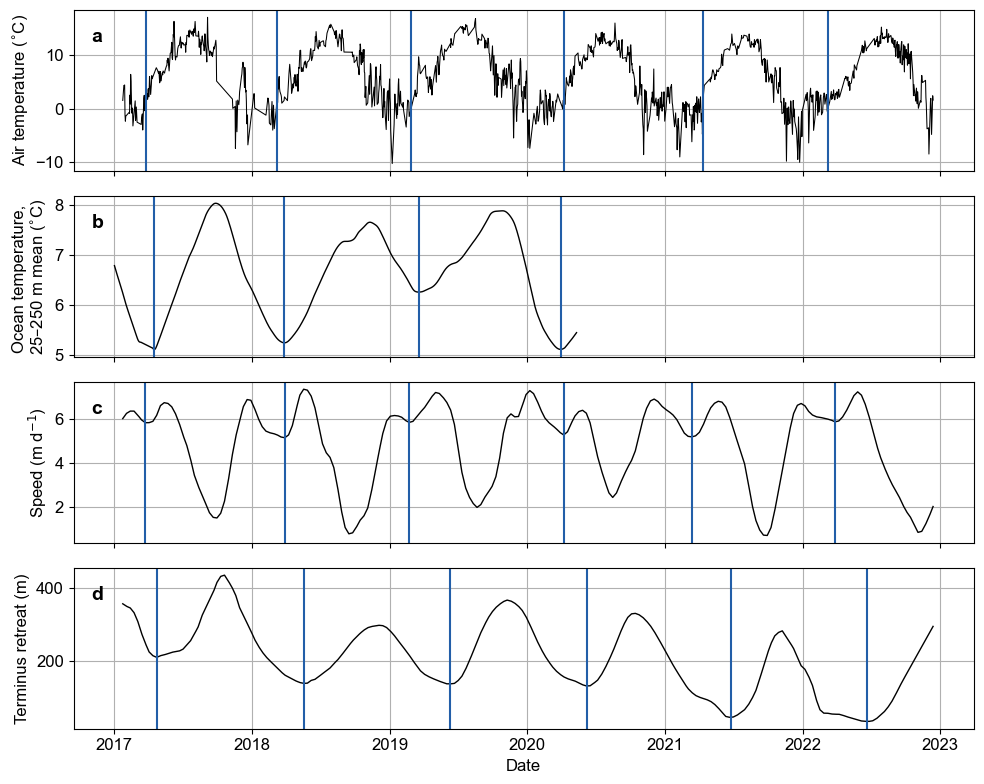

Figure saved to file: /Users/raineyaberle/Research/Hubbard/figures/speed_weather_spring_timings.png


In [22]:
fontsize = 12
linecolor='k'
linewidth = 1
onset_color = '#225ea8'
plt.rcParams.update({'font.size': fontsize, 'font.sans-serif': 'Arial'})
fig, ax = plt.subplots(4, 1, figsize=(10,8), sharex=True)

df['AirTempC_Yakutat_smooth'] = df['AirTempC_Yakutat'].rolling(center=True, window=14).mean()

# Plot time series
ax[0].plot(df['Date'], df['AirTempC_Yakutat'], '-', color=linecolor, linewidth=linewidth-0.25)
ax[0].set_ylabel('Air temperature ($^{\circ}$C)')
ax[1].plot(df['Date'], df['Mean_ocean_temp_C'], '-', color=linecolor, linewidth=linewidth)
ax[1].set_ylabel('Ocean temperature, \n25–250 m mean ($^{\circ}$C)')
ax[2].plot(df['Date'], np.divide(df['surface_speed_m_per_yr'], 365), '-', color=linecolor, linewidth=linewidth)
ax[2].set_ylabel('Speed (m d$^{-1}$)')
ax[3].plot(df['Date'], df['terminus_retreat_m'], '-', color=linecolor, linewidth=linewidth)
ax[3].set_ylabel('Terminus retreat (m)')
ax[3].set_xlabel('Date')

# Plot annual onsets
for year in df['Date'].dt.year.drop_duplicates().values:
    df_year = df.loc[(df['Date'].dt.year==year) & (df['Date'].dt.month <= 10)].reset_index()
    df_year.loc[np.isnan(df_year['AirTempC_Yakutat']), 'AirTempC_Yakutat'] = 1
    # persistent PDDs
    I = [i for i in range(len(df_year)) if (df_year['AirTempC_Yakutat'].iloc[i:] > 0).all()][0]
    pdd_date = df_year.loc[I, 'Date']
    ax[0].axvline(pdd_date, color=onset_color)
    # ocean warming
    if year < 2021:
        I = df_year['Mean_ocean_temp_C'].idxmin()
        ocean_date = df_year.loc[I, 'Date']
        ax[1].axvline(ocean_date, color=onset_color)
    # spring speedup
    df_year_early = df_year.loc[df_year['Date'].dt.month <= 4]
    Imin = df_year_early['surface_speed_m_per_yr'].idxmin()
    speedup_date = df_year_early.loc[Imin, 'Date']
    ax[2].axvline(speedup_date, color=onset_color)
    # terminus retreat
    retreat_date = df_year.loc[df_year['retreat_rate_m_per_yr'] > 0, 'Date'].values[0]
    ax[3].axvline(retreat_date, color=onset_color)

labels = ['a', 'b', 'c', 'd']
for axis, label in zip(ax, labels):
    # add grid
    axis.grid()
    # add panel label
    axis.text(0.02, 0.8, label, fontsize=fontsize+2, fontweight='bold', transform=axis.transAxes)

fig.tight_layout()
plt.show()

# Save figure
fig_fn = os.path.join(out_path, 'speed_weather_spring_timings.png')
fig.savefig(fig_fn, dpi=300, bbox_inches='tight')
print('Figure saved to file:', fig_fn)